# Are Relations Relevant in CNNs? *A Study Based on a Facial Dataset*

## Testing Baseline CNN *(20 Epochs - 15 Layers)*

### Imports, Seed, GPU integration

In [1]:
import numpy as np
import random
import tensorflow as tf

In [2]:
# Seeds for better reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


### Data preparation

In [5]:
test_path = '../../../picasso_dataset/basis-data/shifted/test'

In [6]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['no_face', 'face'], batch_size=10, shuffle=False)

Found 3000 images belonging to 2 classes.


In [7]:
assert test_batches.n == 3000
assert test_batches.num_classes == 2

### Loading the trained CNN

In [8]:
filename='../models/CNN-B-20E-15L-02.h5'
loaded_model = load_model(filename)

### Accuracy and loss of the trained model

In [9]:
scores = loaded_model.evaluate(test_batches, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]*100))

300/300 - 7s - loss: 0.2744 - accuracy: 0.9153
Accuracy: 91.53%
Loss: 27.44%


### Testing the CNN

In [10]:
predictions = loaded_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

### Index of wrongly predicted pictures

In [11]:
y_true=test_batches.classes
y_pred=np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)

In [12]:
face_but_predicted_no_face=[]
no_face_but_predicted_face=[]

for i in range(len(predictions)):
        if y_true[i] != y_pred[i]:
            if y_true[i] == 1:
                face_but_predicted_no_face.append(i+8001-1500) #Index of file on disk
            else:
                no_face_but_predicted_face.append(i+8001) #Index of file on disk

print("Data from class 'face', that was wrongly predicted as 'no-face' [", len(face_but_predicted_no_face), "] :")
print(face_but_predicted_no_face)
print("----------------------------------------------------------------------------------------------")
print("Data from class 'no-face', that was wrongly predicted as 'face' [", len(no_face_but_predicted_face), "] :")
print(no_face_but_predicted_face)

Data from class 'face', that was wrongly predicted as 'no-face' [ 222 ] :
[8003, 8004, 8005, 8007, 8012, 8024, 8029, 8031, 8032, 8038, 8040, 8042, 8043, 8051, 8069, 8071, 8080, 8083, 8084, 8092, 8096, 8103, 8104, 8109, 8112, 8113, 8118, 8119, 8122, 8126, 8129, 8134, 8137, 8139, 8143, 8144, 8146, 8149, 8152, 8157, 8160, 8170, 8175, 8178, 8179, 8185, 8187, 8190, 8192, 8204, 8207, 8210, 8216, 8219, 8231, 8237, 8243, 8244, 8247, 8251, 8272, 8276, 8278, 8285, 8289, 8294, 8297, 8303, 8305, 8306, 8307, 8308, 8309, 8312, 8327, 8331, 8338, 8339, 8340, 8343, 8345, 8346, 8348, 8350, 8367, 8371, 8376, 8377, 8378, 8379, 8381, 8385, 8386, 8391, 8397, 8399, 8400, 8402, 8403, 8406, 8407, 8409, 8410, 8413, 8419, 8421, 8422, 8427, 8431, 8439, 8440, 8447, 8449, 8451, 8452, 8454, 8456, 8457, 8466, 8467, 8470, 8476, 8479, 8488, 8492, 9004, 9011, 9018, 9019, 9020, 9023, 9031, 9038, 9046, 9049, 9052, 9055, 9061, 9062, 9069, 9083, 9084, 9085, 9091, 9094, 9100, 9105, 9109, 9120, 9125, 9139, 9144, 9146, 9149, 9

### Confusion matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
test_batches.class_indices

{'no_face': 0, 'face': 1}

Confusion matrix, without normalization
[[1468   32]
 [ 222 1278]]


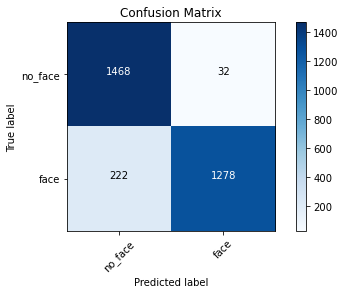

In [15]:
cm_plot_labels = ['no_face','face']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
